In [7]:
!mkdir ../checkpoints
!wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

mkdir: cannot create directory ‘../checkpoints’: File exists
--2024-03-30 15:56:18--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.206.74, 52.219.60.123, 3.5.144.10, ...
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.206.74|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-03-30 15:56:19 ERROR 403: Forbidden.



In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

/home/gyi/anaconda3/envs/rob542/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


In [6]:
# config_file = '/home/gyi/rob542/SegFormer/local_configs/segformer/B1/segformer.b1.512x512.ade.160k.py'
config_file = '/home/gyi/rob542/SegFormer/local_configs/segformer/B0/segformer.b0.512x1024.city.160k.py'
# checkpoint_file = '/home/gyi/rob542/SegFormer/checkpoints/segformer.b1.512x512.ade.160k.pth'
checkpoint_file = '/home/gyi/rob542/SegFormer/checkpoints/iter_160000.pth'

In [7]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /home/gyi/rob542/SegFormer/checkpoints/iter_160000.pth


In [8]:
# test a single image
img = 'demo.png'
result = inference_segmentor(model, img)

/home/gyi/rob542/SegFormer/mmseg/models/segmentors/base.py:268: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


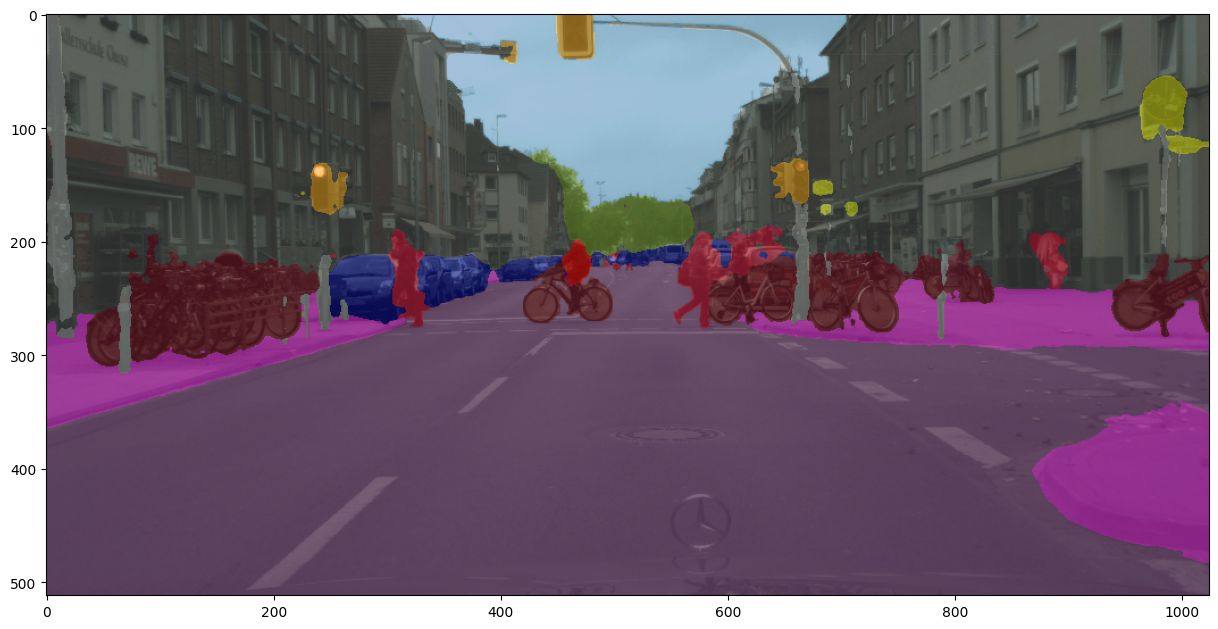

In [12]:
# show the results
#show_result_pyplot(model, img, result, get_palette('ade'))
show_result_pyplot(model, img, result, get_palette('cityscapes'))